In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\DTA_Project\Data-Analysis\StudentPerformanceFactors.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# 1. Problem Statement

# The primary goal of gathering data on factors affecting student performance is to discover the important aspects that influence academic outcomes. Understanding these elements allows schools and universities to devise focused measures to increase student achievement. This data tries to demonstrate trends and relationships between many aspects, such as demographics, study habits, and socioeconomic position, and how these affects academic success. By examining these indicators, we can address issues such as high dropout rates and poor grades and identify where resources should be directed.

# Describing the Dataset and the Data Types that was used


# Hours_Studied (Integer): It suggests the number of hours a student devotes towards his books. It is an integer value that proves useful in a study conducted to determine the correlation between the amount of study time and the results achieved.


# Attendance (Integer): Attends to the student’s attendance level in percentage form. This integer value is important for seeing any relationship that is present between good class attendance and better exam results.


# Parental_Involvement (String/Categorical): Explains how much the parent is involved in the student’s academic life, which could be low, medium or high. Known as a categorical variable, it assists in evaluating the effects of a particular factor namely, parental support on the performance of a particular student.


# Access_to_Resources (String/Categorical): Refers to the availability of learning resources students and any other requirements in academics like library, books, computers etc., in the form of Low, Medium or High. This can be used in order to assess whether or not the availability of resources affects the learning results.


# Extracurricular_Activities (Boolean/String): Indicates if the student is involved in extra co-curricular activities, coded as ‘1’ for Yes, and ‘0’ for No. This binary variable assists in determining whether or not engaging in other activities apart from academics have an impact on performance.


# Sleep_Hours (Integer): Hours of sleep which the student spends per day. It helps to reduce the bias while analysing the relationship between sleep patterns and concentration as well as the academic performance.


# Previous_Scores (Integer): This brings out the student’s scores from previous assessments. The aforesaid historical data point can also be used in modelling current performance trends and noting areas of concern.


# Motivation_Level (String/Categorical): Describes the student’s motivation status; it could be low, moderate or high. Such qualitative data used in the research aids in explaining the effect of motivation on learning and examination performance.

# Internet_Access (Boolean/String): Indicates whether the student has Internet connection or not, by a ‘Yes’ or a ‘No’. This factor is particularly vital today that education has turned to rely on internet especially in accessing learning materials.


# Tutoring_Sessions (Integer): A variable illustrating the total amount of tutoring sessions the student participated in. This integer value assists in analysing whether extra academic aid has a positive impact and consequently raise the performance.


# Family_Income (String/Categorical): Defines the type of income of student’s family as low, medium or high-income group. It assists in finding out whether or not economic status has a role to play in academic achievement.


# Teacher_Quality (String/Categorical): Explains the student’s perceived quality of the teachers he or she gets, which could take the value of ‘Low’, ‘Medium’, or ‘High’. This factor assists in checking whether there is a connection between the quality of teachers and achievement of students.


# School_Type (String/Categorical): Tells the type of school the student goes to, ‘public’ or ‘Private’. Analysing this variable, we can get some insights about how students perform differently in various educational contexts.


# Peer_Influence (String/Categorical): Explains the extent, nature and intensity of the impact of peers on the student as ‘Positive’, ‘Negative’, or ‘Neutral’. It assists to evaluate the effects of social factors towards the academic conduct.


# Physical_Activity (Integer): Assesses the extent to which the student involves himself/ herself in physical exercise usually on a rating scale (such as 1-5). Lack of personal care results in damages in physical health that affect concentration and overall well-being.


# Learning_Disabilities (Boolean/String): The variable identifies whether the student has any diagnosed learning disabilities, and it has ‘Yes’ and ‘No’ as possible values. This information can be used to design programs to support the students as well as make provisions for barrier-free facilities.


# Parental_Education_Level (String/Categorical): Shows the degrees of the student’s parents that education has offered them (for example ‘High School’, ‘College’, ‘Postgraduate’). This is useful especially when you want to analyse the background socio-economic environment impact on students’ performance.


# Distance_from_Home (String/Categorical): Holds the values indicating the distance from the student home to school for example, ‘Near’, ‘Moderate’, ‘Far’. This may affect the timing of the day-to-day mobility and the energy that is used up in midst of the day.


# Gender (String/Categorical): Enables the determination of sex of the student whether Male or female. This categorical variable enables one to ascertain performance trends from the gender perspective.


# Exam_Score (Integer): In this case, it depicts the student’s performance in the final exam. This is a way of measuring academic performance as a primitive indicator and it is an integer so that scoring can be easily done.

# 2. Data Cleaning

In [4]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
columns_with_nan_values = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
columns_with_nan_values

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [7]:
#checking for outliers as no one can score above 100 in an exams
data[data["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [8]:
data.drop(1521, inplace= True)
data.reset_index(drop= True, inplace= True)

In [9]:
data[data["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1524,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(f"\033[31m{'*'*20} {i.upper()}{'*'*20}\033[30m ")
        print(data[i].value_counts())
        print()

******************** PARENTAL_INVOLVEMENT******************** 
Parental_Involvement
Medium    3361
High      1908
Low       1337
Name: count, dtype: int64

******************** ACCESS_TO_RESOURCES******************** 
Access_to_Resources
Medium    3318
High      1975
Low       1313
Name: count, dtype: int64

******************** EXTRACURRICULAR_ACTIVITIES******************** 
Extracurricular_Activities
Yes    3937
No     2669
Name: count, dtype: int64

******************** MOTIVATION_LEVEL******************** 
Motivation_Level
Medium    3351
Low       1937
High      1318
Name: count, dtype: int64

******************** INTERNET_ACCESS******************** 
Internet_Access
Yes    6107
No      499
Name: count, dtype: int64

******************** FAMILY_INCOME******************** 
Family_Income
Low       2671
Medium    2666
High      1269
Name: count, dtype: int64

******************** TEACHER_QUALITY******************** 
Teacher_Quality
Medium    3925
High      1947
Low        656
Name: cou

In [11]:
#checking for dublicates 
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [12]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6602,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6603,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6604,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [13]:
data["Parental_Involvement"].str.strip("/123...")

0          Low
1          Low
2       Medium
3          Low
4       Medium
         ...  
6601      High
6602      High
6603    Medium
6604      High
6605    Medium
Name: Parental_Involvement, Length: 6606, dtype: object

In [14]:
data["Parental_Involvement"]=data["Parental_Involvement"].str.strip("/123...")

In [15]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [16]:
#separating integer columns from string columns 
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
strings_cols = data.select_dtypes(include=['object']).columns

In [17]:
#filling the null values 
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
for col in strings_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [18]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [19]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6602,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6603,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6604,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# 3. Exploratory Data

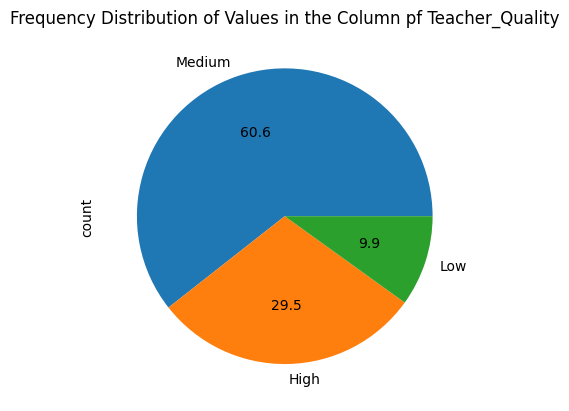

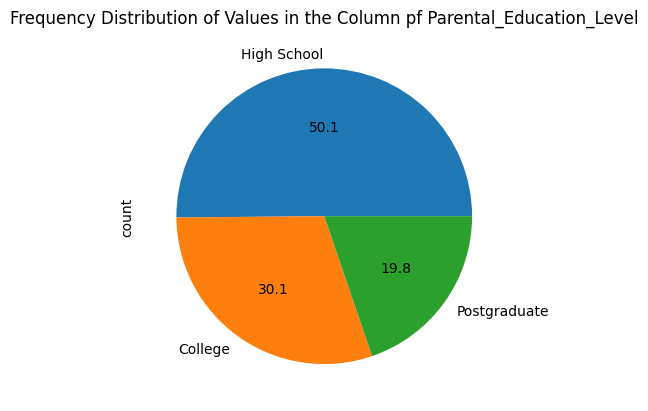

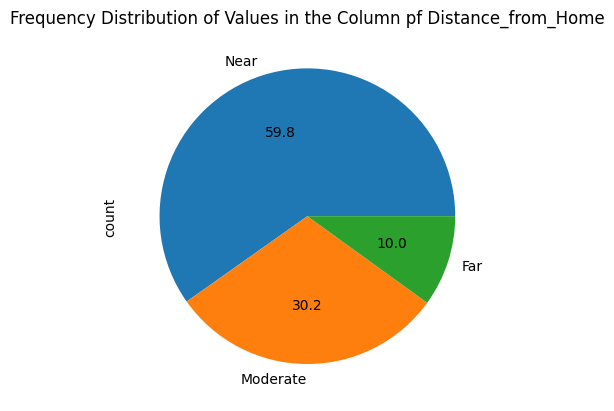

In [20]:
for column in columns_with_nan_values:
    data[column].value_counts().plot(kind='pie',autopct='%.1f')
    plt.title('Frequency Distribution of Values in the Column pf '+str(column))
    plt.show()

# 4. Machine Learning

In [21]:
data.loc[data.Access_to_Resources == 'Low', "Access_to_Resources"] = 0
data.loc[data.Access_to_Resources == 'Medium', "Access_to_Resources"] = 1
data.loc[data.Access_to_Resources == 'High', "Access_to_Resources"] = 2
data["Access_to_Resources"] = data["Access_to_Resources"].astype('int64')

data.loc[data.Parental_Involvement == 'Low', "Parental_Involvement"] = 0
data.loc[data.Parental_Involvement == 'Medium', "Parental_Involvement"] = 1
data.loc[data.Parental_Involvement == 'High', "Parental_Involvement"] = 2
data["Parental_Involvement"] = data["Parental_Involvement"].astype('int64')

data.loc[data.Extracurricular_Activities == 'No', "Extracurricular_Activities"] = 0
data.loc[data.Extracurricular_Activities == 'Yes', "Extracurricular_Activities"] = 1
data["Extracurricular_Activities"] = data["Extracurricular_Activities"].astype('int64')

data.loc[data.Motivation_Level == 'Low', "Motivation_Level"] = 0
data.loc[data.Motivation_Level == 'Medium', "Motivation_Level"] = 1
data.loc[data.Motivation_Level == 'High', "Motivation_Level"] = 2
data["Motivation_Level"] = data["Motivation_Level"].astype('int64')

data.loc[data.Internet_Access == 'No', "Internet_Access"] = 0
data.loc[data.Internet_Access == 'Yes', "Internet_Access"] = 1
data["Internet_Access"] = data["Internet_Access"].astype('int64')

data.loc[data.Family_Income == 'Low', "Family_Income"] = 0
data.loc[data.Family_Income == 'Medium', "Family_Income"] = 1
data.loc[data.Family_Income == 'High', "Family_Income"] = 2
data["Family_Income"] = data["Family_Income"].astype('int64')

data.loc[data.Teacher_Quality == 'Low', "Teacher_Quality"] = 0
data.loc[data.Teacher_Quality == 'Medium', "Teacher_Quality"] = 1
data.loc[data.Teacher_Quality == 'High', "Teacher_Quality"] = 2
data["Teacher_Quality"] = data["Teacher_Quality"].astype('int64')

data.loc[data.School_Type == 'Public', "School_Type"] = 0
data.loc[data.School_Type == 'Private', "School_Type"] = 1
data["School_Type"] = data["School_Type"].astype('int64')

data.loc[data.Peer_Influence == 'Negative', "Peer_Influence"] = 0
data.loc[data.Peer_Influence == 'Neutral', "Peer_Influence"] = 1
data.loc[data.Peer_Influence == 'Positive', "Peer_Influence"] = 2
data["Peer_Influence"] = data["Peer_Influence"].astype('int64')

data.loc[data.Learning_Disabilities == 'No', "Learning_Disabilities"] = 0
data.loc[data.Learning_Disabilities == 'Yes', "Learning_Disabilities"] = 1
data["Learning_Disabilities"] = data["Learning_Disabilities"].astype('int64')

data.loc[data.Parental_Education_Level == 'High School', "Parental_Education_Level"] = 0
data.loc[data.Parental_Education_Level == 'College', "Parental_Education_Level"] = 1
data.loc[data.Parental_Education_Level == 'Postgraduate', "Parental_Education_Level"] = 2
data["Parental_Education_Level"] = data["Parental_Education_Level"].astype('int64')

data.loc[data.Distance_from_Home == 'Near', "Distance_from_Home"] = 0
data.loc[data.Distance_from_Home == 'Moderate', "Distance_from_Home"] = 1
data.loc[data.Distance_from_Home == 'Far', "Distance_from_Home"] = 2
data["Distance_from_Home"] = data["Distance_from_Home"].astype('int64')

data.loc[data.Gender == 'Male', "Gender"] = 0
data.loc[data.Gender == 'Female', "Gender"] = 1
data["Gender"] = data["Gender"].astype('int64')

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,25,69,2,1,0,7,76,1,1,1,2,1,0,2,2,0,0,0,1,68
6602,23,76,2,1,0,8,81,1,1,3,0,2,0,2,2,0,0,0,1,69
6603,20,90,1,0,1,6,65,0,1,3,0,1,0,0,2,0,2,0,1,68
6604,10,86,2,2,1,6,91,2,1,2,0,1,1,2,3,0,0,2,1,68


In [22]:
array = data.values
X = array[:, 0:19]
Y = array[:, 19:]

validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [23]:
X

array([[23, 84,  0, ...,  0,  0,  0],
       [19, 64,  0, ...,  1,  1,  1],
       [24, 98,  1, ...,  2,  0,  0],
       ...,
       [20, 90,  1, ...,  2,  0,  1],
       [10, 86,  2, ...,  0,  2,  1],
       [15, 67,  1, ...,  2,  0,  0]])

In [24]:
Y

array([[67],
       [61],
       [74],
       ...,
       [68],
       [68],
       [64]])

In [25]:
seed = 5
scoring = 'accuracy'

In [26]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

LR: 0.136067 (0.013940)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA: 0.855984 (0.012577)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

KNN: 0.206088 (0.014731)
CART: 0.210242 (0.023539)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

NB: 0.060932 (0.017540)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

SVM: 0.187169 (0.016776)


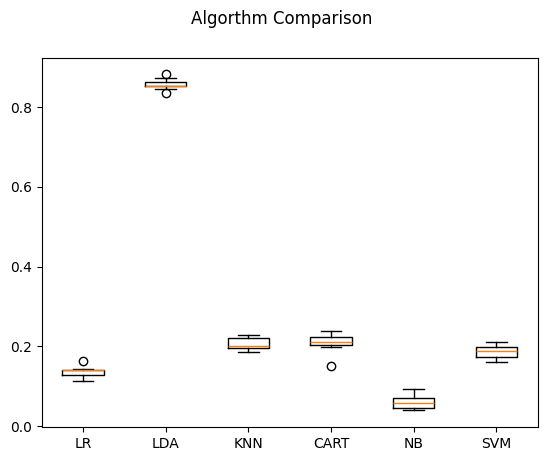

In [27]:
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8540090771558245

[[ 1  1  0 ...  0  0  0]
 [ 0  5  2 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

              precision    recall  f1-score   support

          58       1.00      0.50      0.67         2
          59       0.83      0.71      0.77         7
          60       0.78      0.82      0.80        17
          61       0.84      0.89      0.86        36
          62       0.90      0.84      0.87        56
          63       0.88      0.94      0.91        65
          64       0.97      0.89      0.93        98
          65       0.85      0.88      0.87       129
          66       0.79      0.84      0.82       143
          67       0.88      0.83      0.85       151
          68       0.87      0.93      0.89       147
          69       0.84      0.82      0.83       114
          70       0.88      0.83      0.85       130
          71       0.83      0.89      0.86        87
          72

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res